In [64]:
# import modules

import importlib
import copy

import math

import numpy as np
import pandas as pd
import joblib
import mne
from math import *

import matplotlib.pyplot as plt
import seaborn as sns

import generisAPI
importlib.reload(generisAPI)

import generisAPI.plots as plots
importlib.reload(generisAPI.plots)

import generisAPI.featuresExtraction as featuresMethods
importlib.reload(generisAPI.featuresExtraction)

import generisAPI.analysis as anls
importlib.reload(generisAPI.analysis)

<module 'generisAPI.analysis' from '/media/emmanuel/DATA/Emmanuel_petron_Olateju/github/ubuntu/MMN_SZ/notebooks/generisAPI/analysis.py'>

In [2]:
#load features and make definitions

electrodes=[
    'Fp1','Fp2','F3','F4','C3',
    'C4','P3','P4','O1','O2',
    'F7','F8','T3','T4','T5',
    'T6','FZ','PZ','CZ',
    ]

features = joblib.load('../features/MMN_hubFuzzyEntropy.sav')

y = features['category']
assr_1strest = features['rest1_assr']
assr_2ndrest = features['rest2_assr']
assr_aud = features['aud_assr']
X_entropies = features.iloc[:,2:-1]
mmn_feature_method_100ms = featuresMethods.MMN(19,19,19)
mmn_feature_method_200ms= featuresMethods.MMN(19,38,19)
mmn_feature_method_300ms = featuresMethods.MMN(19,57,19)
mmn_feature_method_400ms = featuresMethods.MMN(19,66,19)
mmn_feature_method_500ms = featuresMethods.MMN(19,85,19)
oneKdeviant = list()
threeKdeviant = list()
for subject in features.index:
    oneKdeviant.append([
        mmn_feature_method_100ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_200ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_300ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_400ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_500ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        ])
    threeKdeviant.append([
        mmn_feature_method_100ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_200ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_300ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_400ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_500ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        ])
X_mmn_1k = np.array(oneKdeviant)
X_mmn_3k = np.array(threeKdeviant)

del oneKdeviant,threeKdeviant

patientsIndex = np.argwhere(np.array(features['category'] == 'Patient')==True).flatten()
controlsIndex = np.argwhere(np.array(features['category'] == 'Control')==True).flatten()

#### ASSR plots

In [35]:
patients_1strest_assr, controls_1strest_assr  = (
    plots.get_assr_data_4_plot(assr_1strest[patientsIndex]),
    plots.get_assr_data_4_plot(assr_1strest[controlsIndex])
)

patients_2ndrest_assr, controls_2ndrest_assr  = (
    plots.get_assr_data_4_plot(assr_2ndrest[patientsIndex]),
    plots.get_assr_data_4_plot(assr_2ndrest[controlsIndex])
)

patients_aud_assr, controls_aud_assr  = (
    plots.get_assr_data_4_plot(assr_aud[patientsIndex]),
    plots.get_assr_data_4_plot(assr_aud[controlsIndex])
)

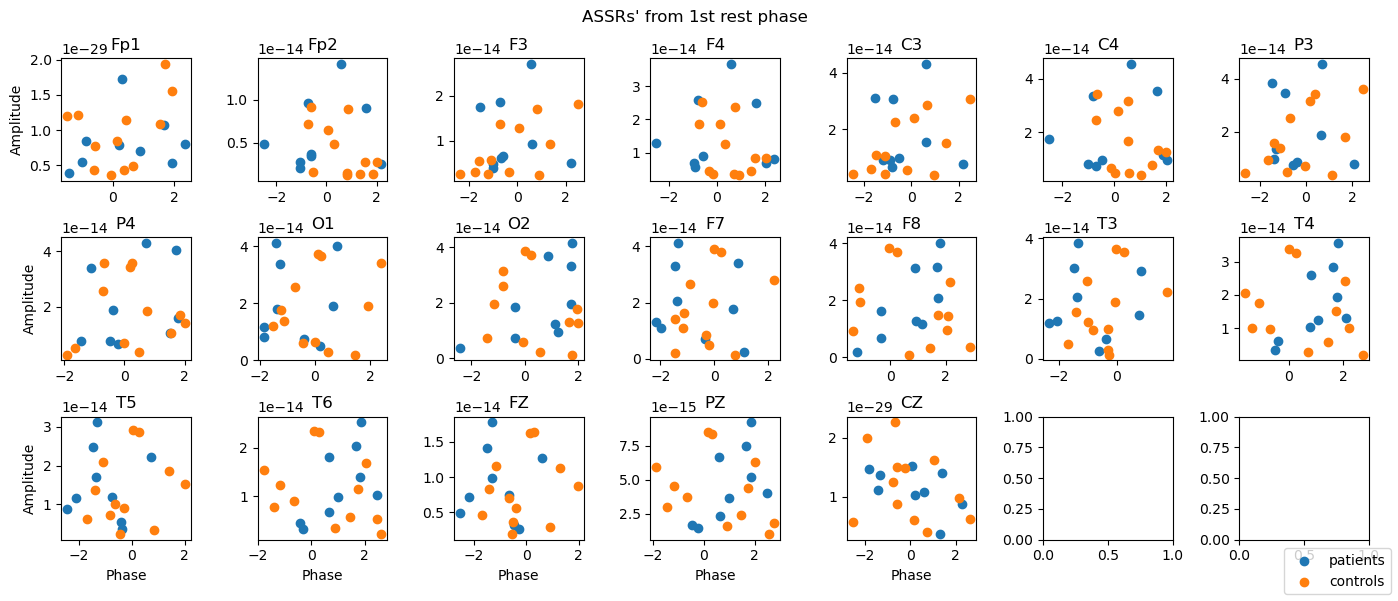

In [65]:
plots.assr_plot(patients_1strest_assr,controls_1strest_assr,electrodes,'ASSRs\' from 1st rest phase')

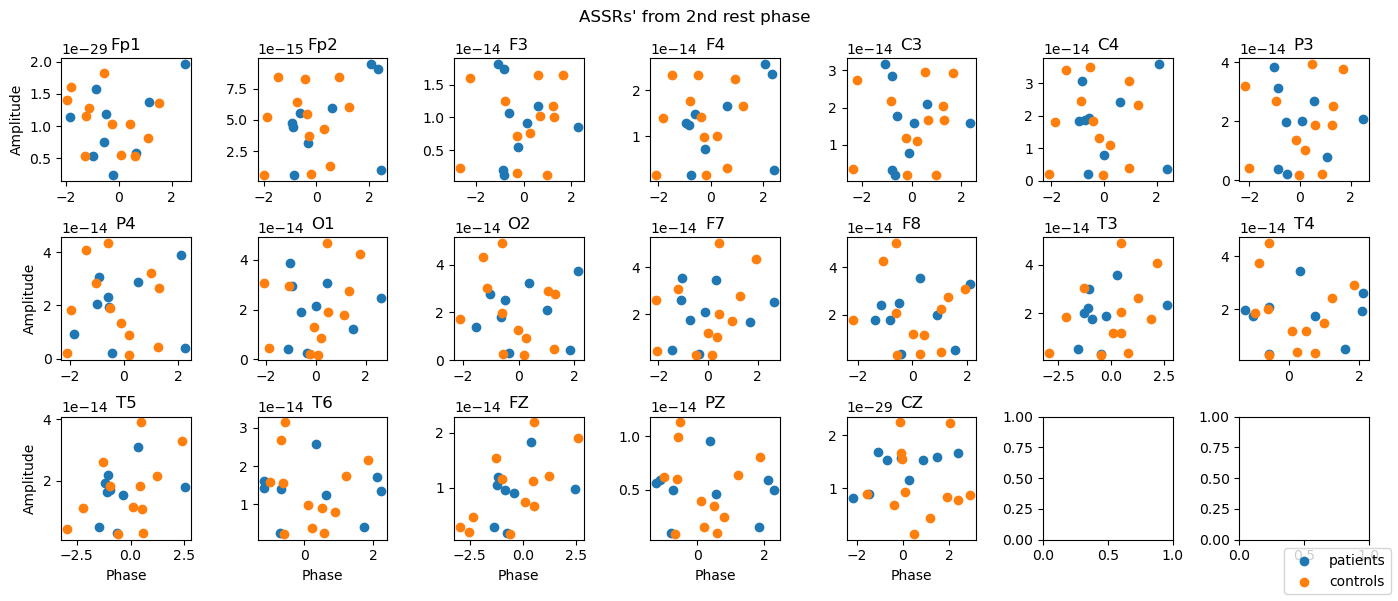

In [66]:
plots.assr_plot(patients_2ndrest_assr,controls_2ndrest_assr,electrodes,'ASSRs\' from 2nd rest phase')

In [8]:
# fig,ax = plt.subplots(len(patientsIndex),3,figsize=(24,57))

# for si,s in enumerate(patientsIndex):
#     plots.montage_plot(assr_1strest[s][0,:],electrodes,ax[si,0])
#     plots.montage_plot(assr_2ndrest[s][0,:],electrodes,ax[si,1])
#     plots.montage_plot(assr_aud[s][0,:],electrodes,ax[si,2])

In [25]:
# fig,ax = plt.subplots(len(controlsIndex),3,figsize=(24,57))

# for si,s in enumerate(controlsIndex):
#     plots.montage_plot(assr_1strest[s][0,:],electrodes,ax[si,0])
#     plots.montage_plot(assr_2ndrest[s][0,:],electrodes,ax[si,1])
#     plots.montage_plot(assr_aud[s][0,:],electrodes,ax[si,2])

#### MMN montage plots

In [ ]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(patientsIndex),5,figsize=(24,43))
fig.suptitle('1000KHz duration deviant MMN montage for SZ patients',fontsize=20)
for si,s in enumerate(patientsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_1k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Patient/1KHz_duration_deviant_montage'+'.png',format='png')
plt.close(fig)

In [ ]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(patientsIndex),5,figsize=(24,43))
fig.suptitle('3000KHz frequency deviant MMN montage for SZ patients',fontsize=20)
for si,s in enumerate(patientsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_3k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Patient/3KHz_frequency_deviant_montage'+'.png',format='png')
plt.close(fig)

In [ ]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(controlsIndex),5,figsize=(24,57))
fig.suptitle('1000KHz duration deviant MMN montage for control subjects',fontsize=20)
for si,s in enumerate(controlsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_1k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Control/1KHz_duration_deviant_montage'+'.png',format='png')

In [ ]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(controlsIndex),5,figsize=(24,57))
fig.suptitle('3000KHz frequency deviant MMN montage for control subjects',fontsize=20)
for si,s in enumerate(controlsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_3k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Control/3KHz_frequency_deviant_montage'+'.png',format='png')

#### fuzzyEntropy montage plots

In [ ]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(patientsIndex),4,figsize=(12,26))
fig.suptitle('cortical regions fuzzy entropy montage for SZ patients',fontsize=20)
for si,s in enumerate(patientsIndex):
    rest1Entropies = np.array([X_entropies.iloc[s,0],X_entropies.iloc[s,4],X_entropies.iloc[s,8],X_entropies.iloc[s,12],X_entropies.iloc[s,12],X_entropies.iloc[s,16],])
    arithEntropies = np.array([X_entropies.iloc[s,1],X_entropies.iloc[s,5],X_entropies.iloc[s,9],X_entropies.iloc[s,13],X_entropies.iloc[s,13],X_entropies.iloc[s,17],])
    rest2Entropies = np.array([X_entropies.iloc[s,2],X_entropies.iloc[s,6],X_entropies.iloc[s,10],X_entropies.iloc[s,14],X_entropies.iloc[s,14],X_entropies.iloc[s,18],])
    auditoryEntropies = np.array([X_entropies.iloc[s,3],X_entropies.iloc[s,7],X_entropies.iloc[s,11],X_entropies.iloc[s,15],X_entropies.iloc[s,15],X_entropies.iloc[s,19],])
    plots.montage_plot(rest1Entropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,0])
    plots.montage_plot(arithEntropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,1])
    plots.montage_plot(rest2Entropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,2])
    plots.montage_plot(auditoryEntropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,3])
    ax[si,0].set_ylabel('Subject ' + str(features.index[s]))
    ax[si,0].set_title('rest1')
    ax[si,1].set_title('arithmetic')
    ax[si,2].set_title('rest2')
    ax[si,3].set_title('auditory')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('../data_analysis_results/FuzzEnt/Patient/montage'+'.png',format='png')
plt.close(fig)

In [11]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(controlsIndex),4,figsize=(10,30))
fig.suptitle('cortical regions fuzzy entropy montage for control subjects',fontsize=20)
for si,s in enumerate(controlsIndex):
    rest1Entropies = np.array([X_entropies.iloc[s,0],X_entropies.iloc[s,4],X_entropies.iloc[s,8],X_entropies.iloc[s,12],X_entropies.iloc[s,12],X_entropies.iloc[s,16],])
    arithEntropies = np.array([X_entropies.iloc[s,1],X_entropies.iloc[s,5],X_entropies.iloc[s,9],X_entropies.iloc[s,13],X_entropies.iloc[s,13],X_entropies.iloc[s,17],])
    rest2Entropies = np.array([X_entropies.iloc[s,2],X_entropies.iloc[s,6],X_entropies.iloc[s,10],X_entropies.iloc[s,14],X_entropies.iloc[s,14],X_entropies.iloc[s,18],])
    auditoryEntropies = np.array([X_entropies.iloc[s,3],X_entropies.iloc[s,7],X_entropies.iloc[s,11],X_entropies.iloc[s,15],X_entropies.iloc[s,15],X_entropies.iloc[s,19],])
    plots.montage_plot(rest1Entropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,0])
    plots.montage_plot(arithEntropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,1])
    plots.montage_plot(rest2Entropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,2])
    plots.montage_plot(auditoryEntropies,['FZ','PZ','CZ','T3','T4','OZ'],ax[si,3])
    ax[si,0].set_ylabel('Subject ' + str(features.index[s]))
    ax[si,0].set_title('rest1')
    ax[si,1].set_title('arithmetic')
    ax[si,2].set_title('rest2')
    ax[si,3].set_title('auditory')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig('../data_analysis_results/FuzzEnt/Control/montage'+'.png',format='png')
plt.close(fig)

#### features analysis

In [27]:
mmnAnalyser = anls.mmnFeaturesAnalysis(electrodes)
mmnAnalyser.compareMMNdevaintsFrame(X_mmn_1k,X_mmn_3k,features['category'],0,'Analysing MMN deviant tone MMN value for 0-100ms','../data_analysis_results/MMN/features/deviant_tone_0.png')
mmnAnalyser.compareMMNdevaintsFrame(X_mmn_1k,X_mmn_3k,features['category'],1,'Analysing MMN deviant tone MMN value for 100-200ms','../data_analysis_results/MMN/features/deviant_tone_1.png')
mmnAnalyser.compareMMNdevaintsFrame(X_mmn_1k,X_mmn_3k,features['category'],2,'Analysing MMN deviant tone MMN value for 200-300ms','../data_analysis_results/MMN/features/deviant_tone_2.png')
mmnAnalyser.compareMMNdevaintsFrame(X_mmn_1k,X_mmn_3k,features['category'],3,'Analysing MMN deviant tone MMN value for 300-400ms','../data_analysis_results/MMN/features/deviant_tone_3.png')
mmnAnalyser.compareMMNdevaintsFrame(X_mmn_1k,X_mmn_3k,features['category'],4,'Analysing MMN deviant tone MMN value for 400-450ms','../data_analysis_results/MMN/features/deviant_tone_4.png')

In [59]:
entropies_corr = X_entropies.corr()

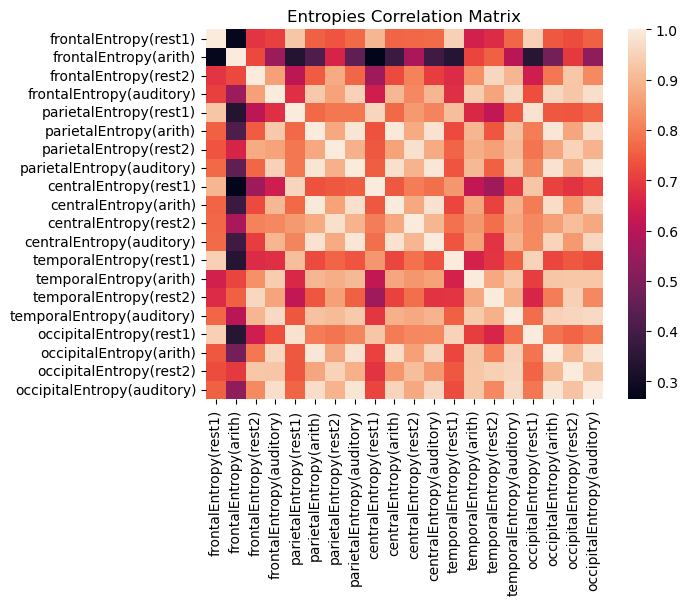

In [60]:
sns.heatmap(data=entropies_corr)
plt.title('Entropies Correlation Matrix')
plt.savefig('../data_analysis_results/FuzzEnt/entropies_corr_mat.png',format='png')

In [48]:
entAnalyser = anls.entropyFeaturesAnalysis()
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,[0,4,8,12,16,2,6,10,14,18]],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='rest phases fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/rest_phases_corr.png')
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,[1,5,9,13,17]],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='arithmetic phases fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/arith_phases_corr.png',size=(10,10))
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,[3,7,11,15,19]],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='auditory phases fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/auditory_phases_corr.png',size=(10,10))

In [55]:
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,list(range(0,4))],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='frontal region fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/frontal_region_corr.png',size=(10,10))
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,list(range(4,8))],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='parietal regions fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/parietal_region_corr.png',size=(10,10))
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,list(range(8,12))],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='central regions fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/central_region_corr.png',size=(10,10))
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,list(range(12,16))],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='temporal regions fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/temporal_region_corr.png',size=(10,10))
entAnalyser.compareEntropiesBtwClasses(X_entropies.iloc[:,list(range(16,20))],patientsIndex=patientsIndex,controlsIndex=controlsIndex,title='occipital regions fuzzy entropy correlations'\
                                       ,name='../data_analysis_results/FuzzEnt/occipital_region_corr.png',size=(10,10))